# image recognition for CIFAR with the convolutional neural networks

### data upload

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


import tensorflow as tf
from tensorflow.keras.models import model_from_json
from google.colab import files

In [0]:
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()
(x_train100, y_train100), (x_test100, y_test100) = cifar100.load_data()

batch_size = 128
# classes names from CIFAR-10
classes=['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_train10 = utils.to_categorical(y_train10, 10)
y_train100 = utils.to_categorical(y_train100, 100)

169009152/169001437 [==============================] - 9s 0us/step


### baseline architecture

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 5s 119us/sample - loss: 1.6084 - acc: 0.4107 - val_loss: 1.3126 - val_acc: 0.5436
Epoch 2/20
40000/40000 [==============================] - 4s 104us/sample - loss: 1.2470 - acc: 0.5516 - val_loss: 1.1033 - val_acc: 0.6124
Epoch 3/20
40000/40000 [==============================] - 4s 105us/sample - loss: 1.0904 - acc: 0.6119 - val_loss: 0.9610 - val_acc: 0.6579
Epoch 4/20
40000/40000 [==============================] - 4s 105us/sample - loss: 0.9948 - acc: 0.6490 - val_loss: 0.9223 - val_acc: 0.6803
Epoch 5/20
40000/40000 [==============================] - 4s 104us/sample - loss: 0.9197 - acc: 0.6764 - val_loss: 0.8209 - val_acc: 0.7090
Epoch 6/20
40000/40000 [==============================] - 4s 104us/sample - loss: 0.8635 - acc: 0.6951 - val_loss: 0.7742 - val_acc: 0.7267
Epoch 7/20
40000/40000 [==============================] - 4s 106us/sample - loss: 0.8167 - acc: 0.7102 - val_l

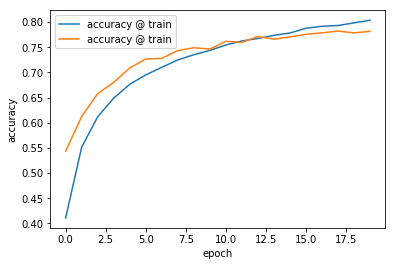

train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425


In [0]:
model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425


## ДЗ: По готовому ноутбуку с занятия сделайте 20 вариантов сетки

## testing different cnn architectures

#### попробую различное кол-во эпох / various number of epochs

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 5s 120us/sample - loss: 1.6237 - acc: 0.4071 - val_loss: 1.3197 - val_acc: 0.5191
Epoch 2/50
40000/40000 [==============================] - 4s 105us/sample - loss: 1.2897 - acc: 0.5343 - val_loss: 1.1573 - val_acc: 0.5889
Epoch 3/50
40000/40000 [==============================] - 4s 104us/sample - loss: 1.1398 - acc: 0.5926 - val_loss: 1.0014 - val_acc: 0.6438
Epoch 4/50
40000/40000 [==============================] - 4s 104us/sample - loss: 1.0390 - acc: 0.6337 - val_loss: 0.9430 - val_acc: 0.6694
Epoch 5/50
40000/40000 [==============================] - 4s 103us/sample - loss: 0.9540 - acc: 0.6639 - val_loss: 0.8562 - val_acc: 0.6977
Epoch 6/50
40000/40000 [==============================] - 4s 105us/sample - loss: 0.8971 - acc: 0.6853 - val_loss: 0.8250 - val_acc: 0.7114
Epoch 7/50
40000/40000 [==============================] - 4s 104us/sample - loss: 0.8424 - acc: 0.7025 - val_l

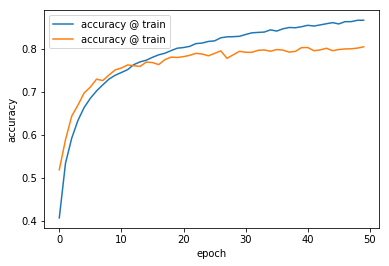

train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905


In [0]:
# 50 epochs

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=50,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905


удалось увеличить и скор, и валид добавлю еще 20 эпох

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 5s 126us/sample - loss: 1.6011 - acc: 0.4148 - val_loss: 1.3857 - val_acc: 0.5129
Epoch 2/70
40000/40000 [==============================] - 4s 106us/sample - loss: 1.2420 - acc: 0.5525 - val_loss: 1.1142 - val_acc: 0.6062
Epoch 3/70
40000/40000 [==============================] - 4s 104us/sample - loss: 1.0860 - acc: 0.6130 - val_loss: 0.9342 - val_acc: 0.6675
Epoch 4/70
40000/40000 [==============================] - 4s 106us/sample - loss: 0.9945 - acc: 0.6479 - val_loss: 0.8824 - val_acc: 0.6855
Epoch 5/70
40000/40000 [==============================] - 4s 107us/sample - loss: 0.9193 - acc: 0.6744 - val_loss: 0.8488 - val_acc: 0.7038
Epoch 6/70
40000/40000 [==============================] - 4s 107us/sample - loss: 0.8699 - acc: 0.6913 - val_loss: 0.8544 - val_acc: 0.7013
Epoch 7/70
40000/40000 [==============================] - 4s 107us/sample - loss: 0.8288 - acc: 0.7079 - val_l

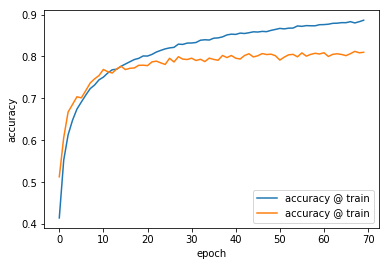

train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858


In [0]:
# inreasing epochs up to 70

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858


валид увеличился, поэтому добавлю еще 20 эпох

Train on 40000 samples, validate on 10000 samples
Epoch 1/90
40000/40000 [==============================] - 5s 119us/sample - loss: 1.6328 - acc: 0.4023 - val_loss: 1.3058 - val_acc: 0.5282
Epoch 2/90
40000/40000 [==============================] - 4s 105us/sample - loss: 1.2766 - acc: 0.5418 - val_loss: 1.1613 - val_acc: 0.5811
Epoch 3/90
40000/40000 [==============================] - 4s 106us/sample - loss: 1.1262 - acc: 0.5999 - val_loss: 0.9344 - val_acc: 0.6690
Epoch 4/90
40000/40000 [==============================] - 4s 106us/sample - loss: 1.0099 - acc: 0.6428 - val_loss: 0.9401 - val_acc: 0.6703
Epoch 5/90
40000/40000 [==============================] - 4s 107us/sample - loss: 0.9356 - acc: 0.6718 - val_loss: 0.8509 - val_acc: 0.6993
Epoch 6/90
40000/40000 [==============================] - 4s 106us/sample - loss: 0.8801 - acc: 0.6892 - val_loss: 0.8228 - val_acc: 0.7119
Epoch 7/90
40000/40000 [==============================] - 4s 106us/sample - loss: 0.8344 - acc: 0.7034 - val_l

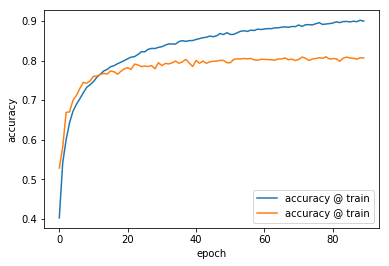

train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749


In [0]:
# inreasing epochs up to 90

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=90,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749


валид несколько упал, возможно, переобучение => имеет смысл попробовать 80 эпох

Train on 40000 samples, validate on 10000 samples
Epoch 1/80
40000/40000 [==============================] - 5s 118us/sample - loss: 1.6114 - acc: 0.4087 - val_loss: 1.2890 - val_acc: 0.5428
Epoch 2/80
40000/40000 [==============================] - 4s 105us/sample - loss: 1.2459 - acc: 0.5516 - val_loss: 1.0883 - val_acc: 0.6105
Epoch 3/80
40000/40000 [==============================] - 4s 105us/sample - loss: 1.0922 - acc: 0.6103 - val_loss: 1.0045 - val_acc: 0.6425
Epoch 4/80
40000/40000 [==============================] - 4s 105us/sample - loss: 0.9932 - acc: 0.6493 - val_loss: 0.9261 - val_acc: 0.6773
Epoch 5/80
40000/40000 [==============================] - 4s 106us/sample - loss: 0.9217 - acc: 0.6751 - val_loss: 0.8296 - val_acc: 0.7080
Epoch 6/80
40000/40000 [==============================] - 4s 106us/sample - loss: 0.8681 - acc: 0.6946 - val_loss: 0.8311 - val_acc: 0.7109
Epoch 7/80
40000/40000 [==============================] - 4s 106us/sample - loss: 0.8178 - acc: 0.7129 - val_l

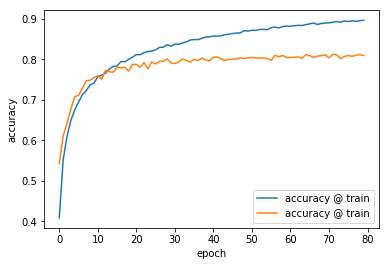

train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767


In [0]:
# 80 epochs

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=80,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749

5_80 epochs: train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767


валид все равно несколько ниже модели на 70 эпох, поэтому оставлю именно это количество

#### testing various number of neurons for the consequential layer

попробую экстенсивно развить модель через увеличение кол-ва нейронов для полносвязанного слоя

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 5s 125us/sample - loss: 1.6262 - acc: 0.4050 - val_loss: 1.3229 - val_acc: 0.5259
Epoch 2/70
40000/40000 [==============================] - 4s 111us/sample - loss: 1.2853 - acc: 0.5353 - val_loss: 1.0877 - val_acc: 0.6127
Epoch 3/70
40000/40000 [==============================] - 4s 110us/sample - loss: 1.1205 - acc: 0.5980 - val_loss: 1.0371 - val_acc: 0.6373
Epoch 4/70
40000/40000 [==============================] - 4s 109us/sample - loss: 1.0225 - acc: 0.6385 - val_loss: 0.9088 - val_acc: 0.6849
Epoch 5/70
40000/40000 [==============================] - 4s 108us/sample - loss: 0.9475 - acc: 0.6641 - val_loss: 0.8352 - val_acc: 0.7083
Epoch 6/70
40000/40000 [==============================] - 4s 109us/sample - loss: 0.8893 - acc: 0.6866 - val_loss: 0.8043 - val_acc: 0.7189
Epoch 7/70
40000/40000 [==============================] - 4s 108us/sample - loss: 0.8397 - acc: 0.7051 - val_l

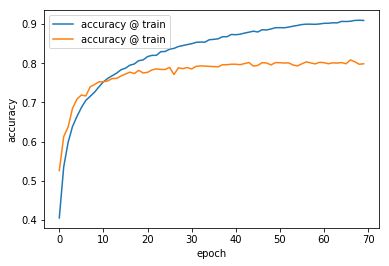

train accuracy: 0.9093499779701233, validation accuracy: 0.7986999750137329


In [0]:
# 1024 neurons for the sequential layer

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749

5_80 epochs: train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767

6_1024 neurons in the sequential layer: train accuracy: 0.9093499779701233, validation accuracy: 0.7986999750137329


валид упал, стратегия неэффективна

#### testing various number of Conv2D core  / тест различного размера ядро сверточного слоя

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 5s 113us/sample - loss: 1.5464 - acc: 0.4317 - val_loss: 1.2688 - val_acc: 0.5674
Epoch 2/70
40000/40000 [==============================] - 4s 95us/sample - loss: 1.1673 - acc: 0.5817 - val_loss: 1.0422 - val_acc: 0.6310
Epoch 3/70
40000/40000 [==============================] - 4s 95us/sample - loss: 1.0124 - acc: 0.6403 - val_loss: 0.8493 - val_acc: 0.6996
Epoch 4/70
40000/40000 [==============================] - 4s 97us/sample - loss: 0.9193 - acc: 0.6781 - val_loss: 0.7943 - val_acc: 0.7184
Epoch 5/70
40000/40000 [==============================] - 4s 96us/sample - loss: 0.8575 - acc: 0.7017 - val_loss: 0.7504 - val_acc: 0.7383
Epoch 6/70
40000/40000 [==============================] - 4s 95us/sample - loss: 0.8008 - acc: 0.7166 - val_loss: 0.7243 - val_acc: 0.7512
Epoch 7/70
40000/40000 [==============================] - 4s 95us/sample - loss: 0.7614 - acc: 0.7313 - val_loss: 0

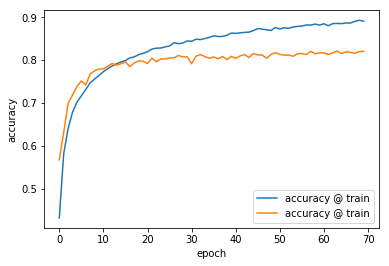

train accuracy: 0.8906499743461609, validation accuracy: 0.8205999732017517


In [0]:
# decreasing 1st Conv2D core to (3,3)

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749

5_80 epochs: train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767

6_1024 neurons in the sequential layer: train accuracy: 0.9093499779701233, validation accuracy: 0.7986999750137329

7_1st Conv2D to (3, 3): train accuracy: 0.8906499743461609, validation accuracy: 0.8205999732017517


по валиду эта архитектура покаызвает лучший результат

#### testing various number of batch nomralization layers / тестирую разное количество слоев батч нормализации

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 5s 136us/sample - loss: 1.7005 - acc: 0.3767 - val_loss: 1.8634 - val_acc: 0.3244
Epoch 2/70
40000/40000 [==============================] - 5s 115us/sample - loss: 1.3036 - acc: 0.5297 - val_loss: 1.0443 - val_acc: 0.6219
Epoch 3/70
40000/40000 [==============================] - 5s 114us/sample - loss: 1.1143 - acc: 0.5996 - val_loss: 0.9523 - val_acc: 0.6560
Epoch 4/70
40000/40000 [==============================] - 5s 115us/sample - loss: 0.9877 - acc: 0.6503 - val_loss: 0.8017 - val_acc: 0.7158
Epoch 5/70
40000/40000 [==============================] - 5s 116us/sample - loss: 0.9140 - acc: 0.6769 - val_loss: 0.7736 - val_acc: 0.7225
Epoch 6/70
40000/40000 [==============================] - 5s 115us/sample - loss: 0.8508 - acc: 0.7017 - val_loss: 0.7373 - val_acc: 0.7390
Epoch 7/70
40000/40000 [==============================] - 5s 115us/sample - loss: 0.8073 - acc: 0.7186 - val_l

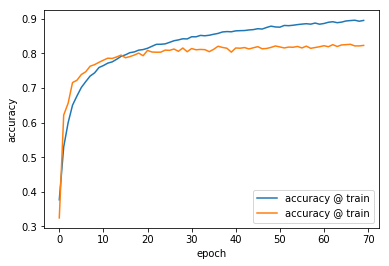

train accuracy: 0.8954749703407288, validation accuracy: 0.823199987411499


In [0]:
# batchnorm layers by every Conv2D layer

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749

5_80 epochs: train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767

6_1024 neurons in the sequential layer: train accuracy: 0.9093499779701233, validation accuracy: 0.7986999750137329

7_1st Conv2D to (3, 3): train accuracy: 0.8906499743461609, validation accuracy: 0.8205999732017517
            
8_batchnorm layers by every Conv2D layer: train accuracy: 0.8954749703407288, validation accuracy: 0.823199987411499

валид повысился => проверяю предположение, чот батчнорм перед прочими слоями повысит точность

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 6s 148us/sample - loss: 1.7519 - acc: 0.4153 - val_loss: 1.7739 - val_acc: 0.3784
Epoch 2/70
40000/40000 [==============================] - 5s 123us/sample - loss: 1.2167 - acc: 0.5643 - val_loss: 0.9764 - val_acc: 0.6508
Epoch 3/70
40000/40000 [==============================] - 5s 119us/sample - loss: 1.0355 - acc: 0.6309 - val_loss: 0.8460 - val_acc: 0.6974
Epoch 4/70
40000/40000 [==============================] - 5s 119us/sample - loss: 0.9298 - acc: 0.6696 - val_loss: 0.7693 - val_acc: 0.7253
Epoch 5/70
40000/40000 [==============================] - 5s 119us/sample - loss: 0.8521 - acc: 0.6990 - val_loss: 0.7305 - val_acc: 0.7418
Epoch 6/70
40000/40000 [==============================] - 5s 119us/sample - loss: 0.7988 - acc: 0.7171 - val_loss: 0.6815 - val_acc: 0.7576
Epoch 7/70
40000/40000 [==============================] - 5s 118us/sample - loss: 0.7575 - acc: 0.7331 - val_l

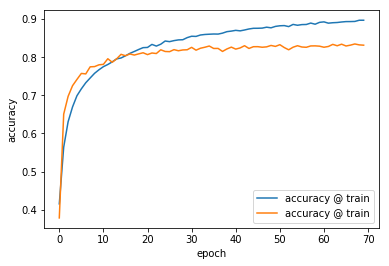

train accuracy: 0.8971499800682068, validation accuracy: 0.8317000269889832


In [0]:
# batchnorm by the sequential layer

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749

5_80 epochs: train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767

6_1024 neurons in the sequential layer: train accuracy: 0.9093499779701233, validation accuracy: 0.7986999750137329

7_1st Conv2D to (3, 3): train accuracy: 0.8906499743461609, validation accuracy: 0.8205999732017517

8_batchnorm by every Conv2D layer: train accuracy: 0.8954749703407288, validation accuracy: 0.823199987411499

9_batchnorm by the sequential layer: train accuracy: 0.8971499800682068, validation accuracy: 0.8317000269889832

добавление нормализации перед полносвязочным слоем увеличило скор по валиду

#### experimenting with max pooling / тестирование кол-ва и размера maxpool слоев

вместо слоя (4,4)  пробую 2 слоя по (2, 2) 

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 6s 149us/sample - loss: 1.7686 - acc: 0.4067 - val_loss: 1.9742 - val_acc: 0.3567
Epoch 2/70
40000/40000 [==============================] - 5s 120us/sample - loss: 1.2322 - acc: 0.5580 - val_loss: 0.9585 - val_acc: 0.6561
Epoch 3/70
40000/40000 [==============================] - 5s 120us/sample - loss: 1.0410 - acc: 0.6288 - val_loss: 0.8430 - val_acc: 0.6977
Epoch 4/70
40000/40000 [==============================] - 5s 120us/sample - loss: 0.9356 - acc: 0.6660 - val_loss: 0.7977 - val_acc: 0.7171
Epoch 5/70
40000/40000 [==============================] - 5s 121us/sample - loss: 0.8663 - acc: 0.6941 - val_loss: 0.7251 - val_acc: 0.7456
Epoch 6/70
40000/40000 [==============================] - 5s 121us/sample - loss: 0.8093 - acc: 0.7138 - val_loss: 0.7363 - val_acc: 0.7412
Epoch 7/70
40000/40000 [==============================] - 5s 120us/sample - loss: 0.7639 - acc: 0.7291 - val_l

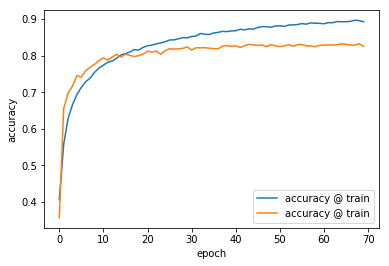

train accuracy: 0.8927500247955322, validation accuracy: 0.8253999948501587


In [0]:
#  changing 1st maxpooling from (4,4) to 2 layers with (2,2)

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749

5_80 epochs: train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767

6_1024 neurons in the sequential layer: train accuracy: 0.9093499779701233, validation accuracy: 0.7986999750137329

7_1st Conv2D to (3, 3): train accuracy: 0.8906499743461609, validation accuracy: 0.8205999732017517

8_batchnorm by every Conv2D layer: train accuracy: 0.8954749703407288, validation accuracy: 0.823199987411499

9_batchnorm by the sequential layer: train accuracy: 0.8971499800682068, validation accuracy: 0.8317000269889832
            
10_1st maxpool 1*(4,4) -> 2*(2, 2) : train accuracy: 0.8927500247955322, validation accuracy: 0.8253999948501587

результат хуже, поэтому тестирую вариант увеличить ядро 2ого maxpool

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 5s 130us/sample - loss: 1.7322 - acc: 0.3787 - val_loss: 2.2846 - val_acc: 0.2614
Epoch 2/70
40000/40000 [==============================] - 4s 112us/sample - loss: 1.3351 - acc: 0.5186 - val_loss: 1.0783 - val_acc: 0.6116
Epoch 3/70
40000/40000 [==============================] - 4s 112us/sample - loss: 1.1435 - acc: 0.5905 - val_loss: 0.9675 - val_acc: 0.6512
Epoch 4/70
40000/40000 [==============================] - 4s 112us/sample - loss: 1.0258 - acc: 0.6356 - val_loss: 0.8529 - val_acc: 0.6948
Epoch 5/70
40000/40000 [==============================] - 4s 112us/sample - loss: 0.9436 - acc: 0.6641 - val_loss: 0.7775 - val_acc: 0.7245
Epoch 6/70
40000/40000 [==============================] - 5s 113us/sample - loss: 0.8860 - acc: 0.6854 - val_loss: 0.7518 - val_acc: 0.7348
Epoch 7/70
40000/40000 [==============================] - 5s 113us/sample - loss: 0.8339 - acc: 0.7040 - val_l

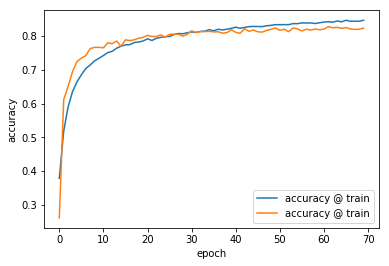

train accuracy: 0.8470249772071838, validation accuracy: 0.8237000107765198


In [0]:
# changing 2nd maxpooling layer (2, 2) -> (4, 4)

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749

5_80 epochs: train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767

6_1024 neurons in the sequential layer: train accuracy: 0.9093499779701233, validation accuracy: 0.7986999750137329

7_1st Conv2D to (3, 3): train accuracy: 0.8906499743461609, validation accuracy: 0.8205999732017517

8_batchnorm by every Conv2D layer: train accuracy: 0.8954749703407288, validation accuracy: 0.823199987411499

9_batchnorm by the sequential layer: train accuracy: 0.8971499800682068, validation accuracy: 0.8317000269889832
            
10_1st maxpool 1*(4,4) -> 2*(2, 2) : train accuracy: 0.8927500247955322, validation accuracy: 0.8253999948501587

11_2nd maxpool (2, 2) -> (4, 4) : train accuracy: 0.8470249772071838, validation accuracy: 0.8237000107765198

скор по валиду снизился -> корректировать maxpool смысла нет

In [0]:
#### testing various neurons of Conv2D / тест различного кол-ва нейронов в сверточных слоях

W0712 12:24:58.535434 139990063019904 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 9s 219us/sample - loss: 1.7666 - acc: 0.3869 - val_loss: 2.2084 - val_acc: 0.2944
Epoch 2/70
40000/40000 [==============================] - 5s 113us/sample - loss: 1.3265 - acc: 0.5215 - val_loss: 1.0890 - val_acc: 0.6042
Epoch 3/70
40000/40000 [==============================] - 5s 113us/sample - loss: 1.1518 - acc: 0.5875 - val_loss: 0.9987 - val_acc: 0.6441
Epoch 4/70
40000/40000 [==============================] - 5s 114us/sample - loss: 1.0406 - acc: 0.6279 - val_loss: 0.8829 - val_acc: 0.6832
Epoch 5/70
40000/40000 [==============================] - 5s 114us/sample - loss: 0.9694 - acc: 0.6565 - val_loss: 0.8153 - val_acc: 0.7113
Epoch 6/70
40000/40000 [==============================] - 5s 115us/sample - loss: 0.9134 - acc: 0.6767 - val_loss: 0.7945 - val_acc: 0.7120
Epoch 7/70
40000/40000 [==============================] - 5s 115us/sample - loss: 0.8659 - acc: 0.6960 - val_l

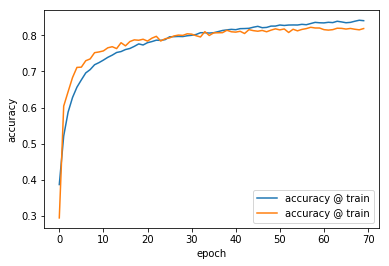

train accuracy: 0.8406999707221985, validation accuracy: 0.8188999891281128


In [0]:
# decreasing the neurons quantaty in 3rd / 4th convolutional layers

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749

5_80 epochs: train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767

6_1024 neurons in the sequential layer: train accuracy: 0.9093499779701233, validation accuracy: 0.7986999750137329

7_1st Conv2D to (3, 3): train accuracy: 0.8906499743461609, validation accuracy: 0.8205999732017517

8_batchnorm by every Conv2D layer: train accuracy: 0.8954749703407288, validation accuracy: 0.823199987411499

9_batchnorm by the sequential layer: train accuracy: 0.8971499800682068, validation accuracy: 0.8317000269889832

10_1st maxpool 1(4,4) -> 2(2, 2) : train accuracy: 0.8927500247955322, validation accuracy: 0.8253999948501587

11_2nd maxpool (2, 2) -> (4, 4) : train accuracy: 0.8470249772071838, validation accuracy: 0.8237000107765198

12_neurons 3/4 Conv2D -> 32: train accuracy: 0.8406999707221985, validation accuracy: 0.8188999891281128

скор упал, попытаюсь напротив увеличить кол-во нейронов в 1/2 сверточном слое

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 14s 343us/sample - loss: 1.7360 - acc: 0.4206 - val_loss: 2.5638 - val_acc: 0.2581
Epoch 2/70
40000/40000 [==============================] - 7s 181us/sample - loss: 1.1779 - acc: 0.5806 - val_loss: 0.9698 - val_acc: 0.6504
Epoch 3/70
40000/40000 [==============================] - 7s 180us/sample - loss: 0.9850 - acc: 0.6511 - val_loss: 0.8701 - val_acc: 0.6850
Epoch 4/70
40000/40000 [==============================] - 7s 180us/sample - loss: 0.8774 - acc: 0.6892 - val_loss: 0.7582 - val_acc: 0.7358
Epoch 5/70
40000/40000 [==============================] - 7s 182us/sample - loss: 0.8001 - acc: 0.7162 - val_loss: 0.7231 - val_acc: 0.7448
Epoch 6/70
40000/40000 [==============================] - 7s 181us/sample - loss: 0.7467 - acc: 0.7345 - val_loss: 0.6854 - val_acc: 0.7677
Epoch 7/70
40000/40000 [==============================] - 7s 181us/sample - loss: 0.6930 - acc: 0.7559 - val_

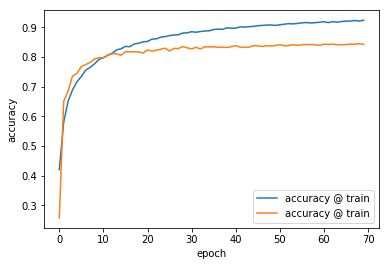

train accuracy: 0.9236999750137329, validation accuracy: 0.8422999978065491


In [0]:
# increasing the neurons quantaty in 1st / 2nd convolutional layers

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749

5_80 epochs: train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767

6_1024 neurons in the sequential layer: train accuracy: 0.9093499779701233, validation accuracy: 0.7986999750137329

7_1st Conv2D to (3, 3): train accuracy: 0.8906499743461609, validation accuracy: 0.8205999732017517

8_batchnorm by every Conv2D layer: train accuracy: 0.8954749703407288, validation accuracy: 0.823199987411499

9_batchnorm by the sequential layer: train accuracy: 0.8971499800682068, validation accuracy: 0.8317000269889832

10_1st maxpool 1(4,4) -> 2(2, 2) : train accuracy: 0.8927500247955322, validation accuracy: 0.8253999948501587

11_2nd maxpool (2, 2) -> (4, 4) : train accuracy: 0.8470249772071838, validation accuracy: 0.8237000107765198

12_neurons 3/4 Conv2D -> 32 : train accuracy: 0.8406999707221985, validation accuracy: 0.8188999891281128
           
13_neurons 1/2 Conv2D -> 32 : train accuracy: 0.9236999750137329, validation accuracy: 0.8422999978065491

удалось поднять валид, напрашивается тест дальнейшего увеличения кол-ва нейронов, попробую с 3 / 4 слоев сверстки

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 9s 214us/sample - loss: 1.7344 - acc: 0.4500 - val_loss: 2.1381 - val_acc: 0.3040
Epoch 2/70
40000/40000 [==============================] - 8s 189us/sample - loss: 1.0712 - acc: 0.6230 - val_loss: 0.8122 - val_acc: 0.7056
Epoch 3/70
40000/40000 [==============================] - 8s 190us/sample - loss: 0.8881 - acc: 0.6867 - val_loss: 0.7559 - val_acc: 0.7346
Epoch 4/70
40000/40000 [==============================] - 8s 192us/sample - loss: 0.7919 - acc: 0.7182 - val_loss: 0.6877 - val_acc: 0.7556
Epoch 5/70
40000/40000 [==============================] - 8s 192us/sample - loss: 0.7148 - acc: 0.7494 - val_loss: 0.6651 - val_acc: 0.7677
Epoch 6/70
40000/40000 [==============================] - 8s 191us/sample - loss: 0.6479 - acc: 0.7738 - val_loss: 0.6278 - val_acc: 0.7821
Epoch 7/70
40000/40000 [==============================] - 8s 193us/sample - loss: 0.6056 - acc: 0.7861 - val_l

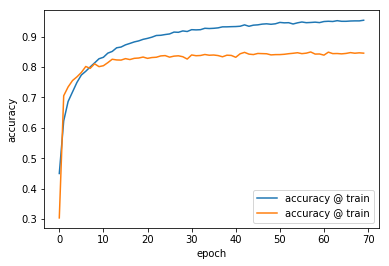

train accuracy: 0.9538000226020813, validation accuracy: 0.8456000089645386


In [0]:
# increasing the neurons quantaty in 3/4 convolutional layers

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749

5_80 epochs: train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767

6_1024 neurons in the sequential layer: train accuracy: 0.9093499779701233, validation accuracy: 0.7986999750137329

7_1st Conv2D to (3, 3): train accuracy: 0.8906499743461609, validation accuracy: 0.8205999732017517

8_batchnorm by every Conv2D layer: train accuracy: 0.8954749703407288, validation accuracy: 0.823199987411499

9_batchnorm by the sequential layer: train accuracy: 0.8971499800682068, validation accuracy: 0.8317000269889832

10_1st maxpool 1(4,4) -> 2(2, 2) : train accuracy: 0.8927500247955322, validation accuracy: 0.8253999948501587

11_2nd maxpool (2, 2) -> (4, 4) : train accuracy: 0.8470249772071838, validation accuracy: 0.8237000107765198

12_neurons 3/4 Conv2D -> 32 : train accuracy: 0.8406999707221985, validation accuracy: 0.8188999891281128

13_neurons 1/2 Conv2D -> 32 : train accuracy: 0.9236999750137329, validation accuracy: 0.8422999978065491
            
14_neurons 3/4 Conv2D -> 64 : train accuracy: 0.9538000226020813, validation accuracy: 0.8456000089645386

In [0]:
увеличение кол-ва нейроно продолжает повышать точность, поэтому продолжу увеличивать их кол-во

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 14s 359us/sample - loss: 1.7253 - acc: 0.4532 - val_loss: 2.6710 - val_acc: 0.2298
Epoch 2/70
40000/40000 [==============================] - 13s 314us/sample - loss: 1.0361 - acc: 0.6349 - val_loss: 0.8098 - val_acc: 0.7161
Epoch 3/70
40000/40000 [==============================] - 13s 314us/sample - loss: 0.8606 - acc: 0.6974 - val_loss: 0.7277 - val_acc: 0.7403
Epoch 4/70
40000/40000 [==============================] - 13s 318us/sample - loss: 0.7583 - acc: 0.7327 - val_loss: 0.6603 - val_acc: 0.7669
Epoch 5/70
40000/40000 [==============================] - 13s 317us/sample - loss: 0.6815 - acc: 0.7616 - val_loss: 0.6230 - val_acc: 0.7840
Epoch 6/70
40000/40000 [==============================] - 13s 317us/sample - loss: 0.6177 - acc: 0.7839 - val_loss: 0.6233 - val_acc: 0.7848
Epoch 7/70
40000/40000 [==============================] - 13s 316us/sample - loss: 0.5527 - acc: 0.8066 

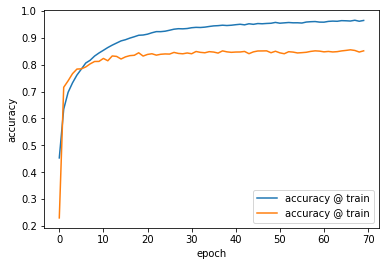

train accuracy: 0.9649999737739563, validation accuracy: 0.8518999814987183


In [0]:
# increasing the neurons quantaty in 1/2 convolutional layers up to 128

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749

5_80 epochs: train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767

6_1024 neurons in the sequential layer: train accuracy: 0.9093499779701233, validation accuracy: 0.7986999750137329

7_1st Conv2D to (3, 3): train accuracy: 0.8906499743461609, validation accuracy: 0.8205999732017517

8_batchnorm by every Conv2D layer: train accuracy: 0.8954749703407288, validation accuracy: 0.823199987411499

9_batchnorm by the sequential layer: train accuracy: 0.8971499800682068, validation accuracy: 0.8317000269889832

10_1st maxpool 1(4,4) -> 2(2, 2) : train accuracy: 0.8927500247955322, validation accuracy: 0.8253999948501587

11_2nd maxpool (2, 2) -> (4, 4) : train accuracy: 0.8470249772071838, validation accuracy: 0.8237000107765198

12_neurons 3/4 Conv2D -> 32 : train accuracy: 0.8406999707221985, validation accuracy: 0.8188999891281128

13_neurons 1/2 Conv2D -> 32 : train accuracy: 0.9236999750137329, validation accuracy: 0.8422999978065491

14_neurons 3/4 Conv2D -> 64 : train accuracy: 0.9538000226020813, validation accuracy: 0.8456000089645386
            
15_neurons 1/2 Conv2D -> 128 : train accuracy: 0.9649999737739563, validation accuracy: 0.8518999814987183

продолжаю повышать кол-во нейронов

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 15s 382us/sample - loss: 1.8063 - acc: 0.4718 - val_loss: 2.2889 - val_acc: 0.3051
Epoch 2/70
40000/40000 [==============================] - 14s 349us/sample - loss: 0.9800 - acc: 0.6576 - val_loss: 0.7959 - val_acc: 0.7168
Epoch 3/70
40000/40000 [==============================] - 14s 349us/sample - loss: 0.8083 - acc: 0.7151 - val_loss: 0.6820 - val_acc: 0.7616
Epoch 4/70
40000/40000 [==============================] - 14s 348us/sample - loss: 0.6999 - acc: 0.7532 - val_loss: 0.6388 - val_acc: 0.7765
Epoch 5/70
40000/40000 [==============================] - 14s 349us/sample - loss: 0.6196 - acc: 0.7823 - val_loss: 0.6047 - val_acc: 0.7961
Epoch 6/70
40000/40000 [==============================] - 14s 349us/sample - loss: 0.5532 - acc: 0.8058 - val_loss: 0.6004 - val_acc: 0.8014
Epoch 7/70
40000/40000 [==============================] - 14s 349us/sample - loss: 0.5036 - acc: 0.8209 

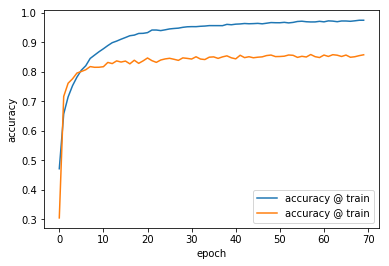

train accuracy: 0.9750750064849854, validation accuracy: 0.8579999804496765


In [0]:
# increasing the neurons quantaty in 3/4 convolutional layers up to 256

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749

5_80 epochs: train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767

6_1024 neurons in the sequential layer: train accuracy: 0.9093499779701233, validation accuracy: 0.7986999750137329

7_1st Conv2D to (3, 3): train accuracy: 0.8906499743461609, validation accuracy: 0.8205999732017517

8_batchnorm by every Conv2D layer: train accuracy: 0.8954749703407288, validation accuracy: 0.823199987411499

9_batchnorm by the sequential layer: train accuracy: 0.8971499800682068, validation accuracy: 0.8317000269889832

10_1st maxpool 1(4,4) -> 2(2, 2) : train accuracy: 0.8927500247955322, validation accuracy: 0.8253999948501587

11_2nd maxpool (2, 2) -> (4, 4) : train accuracy: 0.8470249772071838, validation accuracy: 0.8237000107765198

12_neurons 3/4 Conv2D -> 32 : train accuracy: 0.8406999707221985, validation accuracy: 0.8188999891281128

13_neurons 1/2 Conv2D -> 32 : train accuracy: 0.9236999750137329, validation accuracy: 0.8422999978065491

14_neurons 3/4 Conv2D -> 64 : train accuracy: 0.9538000226020813, validation accuracy: 0.8456000089645386

15_neurons 1/2 Conv2D -> 128 : train accuracy: 0.9649999737739563, validation accuracy: 0.8518999814987183
            
16_neurons 3/4 Conv2D -> 256 :  train accuracy: 0.9750750064849854, validation accuracy: 0.8579999804496765

все еще работает, продолжаю увеличивать

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 36s 910us/sample - loss: 2.1690 - acc: 0.4714 - val_loss: 2.3946 - val_acc: 0.2126
Epoch 2/70
40000/40000 [==============================] - 32s 799us/sample - loss: 0.9359 - acc: 0.6758 - val_loss: 0.7631 - val_acc: 0.7281
Epoch 3/70
40000/40000 [==============================] - 32s 809us/sample - loss: 0.7604 - acc: 0.7355 - val_loss: 0.6873 - val_acc: 0.7611
Epoch 4/70
40000/40000 [==============================] - 33s 817us/sample - loss: 0.6520 - acc: 0.7714 - val_loss: 0.6502 - val_acc: 0.7767
Epoch 5/70
40000/40000 [==============================] - 33s 824us/sample - loss: 0.5699 - acc: 0.8004 - val_loss: 0.5782 - val_acc: 0.8025
Epoch 6/70
40000/40000 [==============================] - 33s 821us/sample - loss: 0.4919 - acc: 0.8259 - val_loss: 0.5879 - val_acc: 0.8029
Epoch 7/70
40000/40000 [==============================] - 33s 820us/sample - loss: 0.4377 - acc: 0.8460 

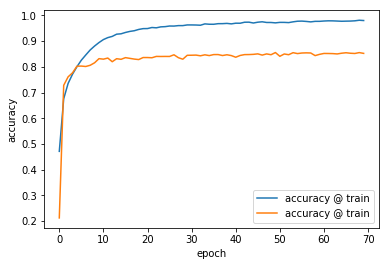

train accuracy: 0.9799749851226807, validation accuracy: 0.8522999882698059


In [0]:
# increasing the neurons quantaty in 1/2 convolutional layers up to 256
# increasing the neurons quantaty in 3/4 convolutional layers up to 512

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749

5_80 epochs: train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767

6_1024 neurons in the sequential layer: train accuracy: 0.9093499779701233, validation accuracy: 0.7986999750137329

7_1st Conv2D to (3, 3): train accuracy: 0.8906499743461609, validation accuracy: 0.8205999732017517

8_batchnorm by every Conv2D layer: train accuracy: 0.8954749703407288, validation accuracy: 0.823199987411499

9_batchnorm by the sequential layer: train accuracy: 0.8971499800682068, validation accuracy: 0.8317000269889832

10_1st maxpool 1(4,4) -> 2(2, 2) : train accuracy: 0.8927500247955322, validation accuracy: 0.8253999948501587

11_2nd maxpool (2, 2) -> (4, 4) : train accuracy: 0.8470249772071838, validation accuracy: 0.8237000107765198

12_neurons 3/4 Conv2D -> 32 : train accuracy: 0.8406999707221985, validation accuracy: 0.8188999891281128

13_neurons 1/2 Conv2D -> 32 : train accuracy: 0.9236999750137329, validation accuracy: 0.8422999978065491

14_neurons 3/4 Conv2D -> 64 : train accuracy: 0.9538000226020813, validation accuracy: 0.8456000089645386

15_neurons 1/2 Conv2D -> 128 : train accuracy: 0.9649999737739563, validation accuracy: 0.8518999814987183

16_neurons 3/4 Conv2D -> 256 : train accuracy: 0.9750750064849854, validation accuracy: 0.8579999804496765
            
17_neurons 1,2/3,4 Conv2D -> 256/512 : train accuracy: 0.9799749851226807, validation accuracy: 0.8522999882698059

последующее увеличение нейронов приводит уже к падению валида

#### testing different dropout values / тестирую варианты коэффициентов дропаут

увеличиваю долю дропаута во 2м слое до 0.5

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 15s 378us/sample - loss: 1.8503 - acc: 0.4383 - val_loss: 2.9198 - val_acc: 0.1577
Epoch 2/70
40000/40000 [==============================] - 14s 349us/sample - loss: 1.0628 - acc: 0.6260 - val_loss: 0.8447 - val_acc: 0.7019
Epoch 3/70
40000/40000 [==============================] - 14s 349us/sample - loss: 0.8947 - acc: 0.6827 - val_loss: 0.7209 - val_acc: 0.7462
Epoch 4/70
40000/40000 [==============================] - 14s 350us/sample - loss: 0.7968 - acc: 0.7187 - val_loss: 0.6913 - val_acc: 0.7609
Epoch 5/70
40000/40000 [==============================] - 14s 349us/sample - loss: 0.7126 - acc: 0.7472 - val_loss: 0.6672 - val_acc: 0.7693
Epoch 6/70
40000/40000 [==============================] - 14s 349us/sample - loss: 0.6574 - acc: 0.7676 - val_loss: 0.5848 - val_acc: 0.7943
Epoch 7/70
40000/40000 [==============================] - 14s 351us/sample - loss: 0.5984 - acc: 0.7904 

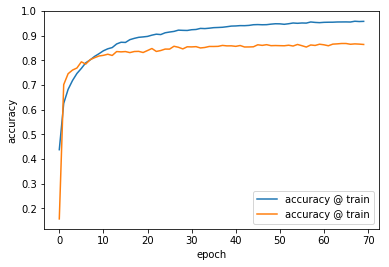

train accuracy: 0.958299994468689, validation accuracy: 0.8647000193595886


In [0]:
# increasing 2nd dropout layer up to 0.5

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749

5_80 epochs: train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767

6_1024 neurons in the sequential layer: train accuracy: 0.9093499779701233, validation accuracy: 0.7986999750137329

7_1st Conv2D to (3, 3): train accuracy: 0.8906499743461609, validation accuracy: 0.8205999732017517

8_batchnorm by every Conv2D layer: train accuracy: 0.8954749703407288, validation accuracy: 0.823199987411499

9_batchnorm by the sequential layer: train accuracy: 0.8971499800682068, validation accuracy: 0.8317000269889832

10_1st maxpool 1(4,4) -> 2(2, 2) : train accuracy: 0.8927500247955322, validation accuracy: 0.8253999948501587

11_2nd maxpool (2, 2) -> (4, 4) : train accuracy: 0.8470249772071838, validation accuracy: 0.8237000107765198

12_neurons 3/4 Conv2D -> 32 : train accuracy: 0.8406999707221985, validation accuracy: 0.8188999891281128

13_neurons 1/2 Conv2D -> 32 : train accuracy: 0.9236999750137329, validation accuracy: 0.8422999978065491

14_neurons 3/4 Conv2D -> 64 : train accuracy: 0.9538000226020813, validation accuracy: 0.8456000089645386

15_neurons 1/2 Conv2D -> 128 : train accuracy: 0.9649999737739563, validation accuracy: 0.8518999814987183

16_neurons 3/4 Conv2D -> 256 : train accuracy: 0.9750750064849854, validation accuracy: 0.8579999804496765

17_neurons 1,2/3,4 Conv2D -> 256/512 : train accuracy: 0.9799749851226807, validation accuracy: 0.8522999882698059

18_2nd dropout -> 0.5 : train accuracy: 0.958299994468689, validation accuracy: 0.8647000193595886

удалось повысить валид, попробую увеличить 1ый дропаут до 0.5

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 15s 382us/sample - loss: 1.8971 - acc: 0.4156 - val_loss: 3.4946 - val_acc: 0.1655
Epoch 2/70
40000/40000 [==============================] - 14s 348us/sample - loss: 1.1569 - acc: 0.5898 - val_loss: 0.8762 - val_acc: 0.6832
Epoch 3/70
40000/40000 [==============================] - 14s 349us/sample - loss: 0.9625 - acc: 0.6578 - val_loss: 0.7613 - val_acc: 0.7303
Epoch 4/70
40000/40000 [==============================] - 14s 349us/sample - loss: 0.8603 - acc: 0.6962 - val_loss: 0.7386 - val_acc: 0.7406
Epoch 5/70
40000/40000 [==============================] - 14s 349us/sample - loss: 0.7908 - acc: 0.7222 - val_loss: 0.6680 - val_acc: 0.7683
Epoch 6/70
40000/40000 [==============================] - 14s 349us/sample - loss: 0.7372 - acc: 0.7411 - val_loss: 0.6944 - val_acc: 0.7650
Epoch 7/70
40000/40000 [==============================] - 14s 350us/sample - loss: 0.7014 - acc: 0.7526 

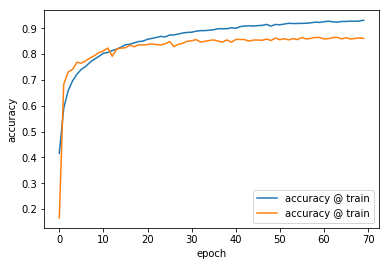

train accuracy: 0.9312000274658203, validation accuracy: 0.8605999946594238


In [0]:
# increasing 1st dropout layer up to 0.5

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749

5_80 epochs: train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767

6_1024 neurons in the sequential layer: train accuracy: 0.9093499779701233, validation accuracy: 0.7986999750137329

7_1st Conv2D to (3, 3): train accuracy: 0.8906499743461609, validation accuracy: 0.8205999732017517

8_batchnorm by every Conv2D layer: train accuracy: 0.8954749703407288, validation accuracy: 0.823199987411499

9_batchnorm by the sequential layer: train accuracy: 0.8971499800682068, validation accuracy: 0.8317000269889832

10_1st maxpool 1(4,4) -> 2(2, 2) : train accuracy: 0.8927500247955322, validation accuracy: 0.8253999948501587

11_2nd maxpool (2, 2) -> (4, 4) : train accuracy: 0.8470249772071838, validation accuracy: 0.8237000107765198

12_neurons 3/4 Conv2D -> 32 : train accuracy: 0.8406999707221985, validation accuracy: 0.8188999891281128

13_neurons 1/2 Conv2D -> 32 : train accuracy: 0.9236999750137329, validation accuracy: 0.8422999978065491

14_neurons 3/4 Conv2D -> 64 : train accuracy: 0.9538000226020813, validation accuracy: 0.8456000089645386

15_neurons 1/2 Conv2D -> 128 : train accuracy: 0.9649999737739563, validation accuracy: 0.8518999814987183

16_neurons 3/4 Conv2D -> 256 : train accuracy: 0.9750750064849854, validation accuracy: 0.8579999804496765

17_neurons 1,2/3,4 Conv2D -> 256/512 : train accuracy: 0.9799749851226807, validation accuracy: 0.8522999882698059

18_2nd dropout -> 0.5 : train accuracy: 0.958299994468689, validation accuracy: 0.8647000193595886

19_1st dropout -> 0.5 : train accuracy: 0.9312000274658203, validation accuracy: 0.8605999946594238

эта конструкция сработала хуже

#### testing various number of layers / тест различного кол-ва слоев

добавлю еще один слой

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 17s 425us/sample - loss: 1.7456 - acc: 0.4162 - val_loss: 2.8364 - val_acc: 0.2349
Epoch 2/70
40000/40000 [==============================] - 15s 378us/sample - loss: 1.0825 - acc: 0.6206 - val_loss: 0.8473 - val_acc: 0.6972
Epoch 3/70
40000/40000 [==============================] - 15s 378us/sample - loss: 0.8482 - acc: 0.7017 - val_loss: 0.6929 - val_acc: 0.7523
Epoch 4/70
40000/40000 [==============================] - 15s 381us/sample - loss: 0.7173 - acc: 0.7508 - val_loss: 0.6126 - val_acc: 0.7813
Epoch 5/70
40000/40000 [==============================] - 15s 380us/sample - loss: 0.6237 - acc: 0.7856 - val_loss: 0.6537 - val_acc: 0.7749
Epoch 6/70
40000/40000 [==============================] - 15s 381us/sample - loss: 0.5426 - acc: 0.8164 - val_loss: 0.5767 - val_acc: 0.8041
Epoch 7/70
40000/40000 [==============================] - 15s 381us/sample - loss: 0.4797 - acc: 0.8359 

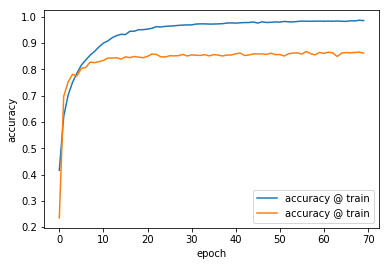

train accuracy: 0.9857500195503235, validation accuracy: 0.8616999983787537


In [0]:
# adding a single layer

model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=70,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['acc'], 
         label='accuracy @ train')
plt.plot(history.history['val_acc'], 
         label='accuracy @ train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(f"train accuracy: {model.history.history['acc'][-1]}, validation accuracy: {model.history.history['val_acc'][-1]}")

1_base: train accuracy: 0.8037999868392944, validation accuracy: 0.7817999720573425

2_50 epochs: train accuracy: 0.8669000267982483, validation accuracy: 0.8051000237464905

3_70 epochs: train accuracy: 0.8864750266075134, validation accuracy: 0.8100000023841858

4_90 epochs: train accuracy: 0.899524986743927, validation accuracy: 0.8065000176429749

5_80 epochs: train accuracy: 0.8966000080108643, validation accuracy: 0.8094000220298767

6_1024 neurons in the sequential layer: train accuracy: 0.9093499779701233, validation accuracy: 0.7986999750137329

7_1st Conv2D to (3, 3): train accuracy: 0.8906499743461609, validation accuracy: 0.8205999732017517

8_batchnorm by every Conv2D layer: train accuracy: 0.8954749703407288, validation accuracy: 0.823199987411499

9_batchnorm by the sequential layer: train accuracy: 0.8971499800682068, validation accuracy: 0.8317000269889832

10_1st maxpool 1(4,4) -> 2(2, 2) : train accuracy: 0.8927500247955322, validation accuracy: 0.8253999948501587

11_2nd maxpool (2, 2) -> (4, 4) : train accuracy: 0.8470249772071838, validation accuracy: 0.8237000107765198

12_neurons 3/4 Conv2D -> 32 : train accuracy: 0.8406999707221985, validation accuracy: 0.8188999891281128

13_neurons 1/2 Conv2D -> 32 : train accuracy: 0.9236999750137329, validation accuracy: 0.8422999978065491

14_neurons 3/4 Conv2D -> 64 : train accuracy: 0.9538000226020813, validation accuracy: 0.8456000089645386

15_neurons 1/2 Conv2D -> 128 : train accuracy: 0.9649999737739563, validation accuracy: 0.8518999814987183

16_neurons 3/4 Conv2D -> 256 : train accuracy: 0.9750750064849854, validation accuracy: 0.8579999804496765

17_neurons 1,2/3,4 Conv2D -> 256/512 : train accuracy: 0.9799749851226807, validation accuracy: 0.8522999882698059

18_2nd dropout -> 0.5 : train accuracy: 0.958299994468689, validation accuracy: 0.8647000193595886

19_1st dropout -> 0.5 : train accuracy: 0.9312000274658203, validation accuracy: 0.8605999946594238

20_a layer added : train accuracy: 0.9857500195503235, validation accuracy: 0.8616999983787537